 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/06/06.ipynb#Modelový-dataset" data-toc-modified-id="Modelový-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modelový dataset</a></span></li><li><span><a href="http://localhost:8888/notebooks/06/06.ipynb#Popisná-statisitka" data-toc-modified-id="Popisná-statisitka-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Popisná statisitka</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/06/06.ipynb#Shrnutí-a-krabicové-grafy" data-toc-modified-id="Shrnutí-a-krabicové-grafy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Shrnutí a krabicové grafy</a></span></li><li><span><a href="http://localhost:8888/notebooks/06/06.ipynb#Popisné-statistiky-jednotlivě" data-toc-modified-id="Popisné-statistiky-jednotlivě-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Popisné statistiky jednotlivě</a></span></li><li><span><a href="http://localhost:8888/notebooks/06/06.ipynb#Histogram" data-toc-modified-id="Histogram-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Histogram</a></span></li></ul></li></ul></div>

# Popisná statistika v R

V této krátké kapitole se stručně seznámíme se základními funkcemi popisné statiskiky, které nám R nabízí. Jelikož je R na statistiku přímo zaměřené, je tato paleta poměrně pestrá. My si zde tedy ukážeme jen to, co asi využijete nejčastěji.

## Modelový dataset

Jako příklad budeme v této lekci používat výsledky studie, která proběhla v roce 2015 a zaměřila se na konzumaci alkoholu ve světě. Surová data z Global Health Observatory Data Repository (http://apps.who.int/ghodata/) máme k dispozici ve formátu CSV, takže jejich načtení do datové tabulky je poměrně snadné:

In [1]:
df_alkohol <- read.table(
    "alcohol_data.csv"
    , sep=","
    , header = T
    , quote = '"'
    , stringsAsFactors = F
)

a vypadají asi takto:

In [2]:
head(df_alkohol, 2)

Series.Name,Series.Code,Country.Name,Country.Code,X1960..YR1960.,X1961..YR1961.,X1962..YR1962.,X1963..YR1963.,X1964..YR1964.,X1965..YR1965.,⋯,X2007..YR2007.,X2008..YR2008.,X2009..YR2009.,X2010..YR2010.,X2011..YR2011.,X2012..YR2012.,X2013..YR2013.,X2014..YR2014.,X2015..YR2015.,X2016..YR2016.
"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",SH.ALC.PCAP.LI,Afghanistan,AFG,..,..,..,..,..,..,⋯,..,..,..,..,..,..,..,..,1,..
"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",SH.ALC.PCAP.LI,Albania,ALB,..,..,..,..,..,..,⋯,..,..,..,..,..,..,..,..,6.6,..


Každá řádka tedy obsahuje data pro konkrétní zemi a každý sloupec potom různé informace. Vidíme, že tento datový soubor obashuje poměrně hodně prázdých sloupců. Studie však probíhala pouze v roce 2015, takže pro nás je relevantní pouze sloupec "X2015..YR2015." (v původních datech označený jako "2015 [YR2015]") a popřípadě kód nebo název země, sloupce "Country.Name" nebo "Country.Code". Důvodem k přejmenování sloupců je to, že původní jména obsahují znaky, které mají v R speciální význam nebo jinak kolidují se syntaxí jazyka. Nemohli bychom tak k nim třeba jednoduše přistupovat pomocí operátoru `$`. Čili například názvy sloupců, které začínají na číslo, mají na začátku velké "X", neboť názvy proměnných v R nesmí začínat na čísla.

Pojďme si teď  ale z našich dat vytáhnout jen to, co nás opravdu zajímá. Tedy pouze informace o zemi a kolik litrů vypitého alkoholu v ní ročně připadá na jednoho obyvatele:

In [3]:
head(df_alkohol[c("Country.Name", "X2015..YR2015.")])

Country.Name,X2015..YR2015.
Afghanistan,1
Albania,6.6
Algeria,0.6
American Samoa,..
Andorra,9.1
Angola,7.6


Pojďme ještě změnit jména sloupců na něco čitelnějšího:

In [4]:
df_alkohol <- df_alkohol[c("Country.Name", "X2015..YR2015.")]
colnames(df_alkohol) <- c("Země", "Konzumace")
head(df_alkohol)

Země,Konzumace
Afghanistan,1
Albania,6.6
Algeria,0.6
American Samoa,..
Andorra,9.1
Angola,7.6


V našem sloupci "Konzumace" vidíme zváštní hodnotu "..", která zřejmě indikuje chybějící data, ale určitě není číslo. Pojďme si tedy zkontorlovat o jaký datový typ se jedná:

In [5]:
mode(df_alkohol$Konzumace)

[1] "character"

Data ve sloupci jsou tedy reprezentována řetězcem, ale my potřebujeme číslo. Snadno to můžeme vyřešit pomocí funkce `as.numeric`:

In [6]:
df_alkohol$Konzumace <- as.numeric(df_alkohol$Konzumace)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

R nás varuje, že převedením některých položek došlo k vytvoření neznámých hodnot ve sloupci. V tomto případě to chceme, neboť se zřejmě jedná o data s chybějícími hodnotami:

In [7]:
head(df_alkohol)

Země,Konzumace
Afghanistan,1.0
Albania,6.6
Algeria,0.6
American Samoa,NA
Andorra,9.1
Angola,7.6


Všimněte si použití slova "zřejmě" v předchozí větě. Slepě zde totiž předpokládáme, že jediná hodnota, která byla v datech převedena na `NA` je řetězec "..". Toto nemusí být pravda a v praxi byste si měli tuto hypotézu vždy ověřit! Například porovnáním počtu výskytů řetězců ".." v původních datech a hodnot `NA` v datech nových. My zde tento krok vynecháme, ale v praxi byste měli být obezřetnější.

Země, pro které data chybí, z naší tabulky též snadno odstraníme:

In [8]:
df_alkohol <- df_alkohol[!is.na(df_alkohol$Konzumace),]
head(df_alkohol)

,Země,Konzumace
1,Afghanistan,1.0
2,Albania,6.6
3,Algeria,0.6
5,Andorra,9.1
6,Angola,7.6
7,Antigua and Barbuda,3.2


## Popisná statisitka

### Shrnutí a krabicové grafy

Data tedy máme připravena, takže se pojďme podívat na nějaké základní parametry naší náhodné proměnné, tedy konzumace alkoholu v jednotlivých zemích. Pro rychlý přehled lze použít funkci `summary`. Pokud jí totoiž jako argument pošlete číselný vektor nebo něco, co se tak tváří, vrátí vám shrnutí nejrůznějších popisných statistik:

In [9]:
summary(df_alkohol$Konzumace)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.925   6.282   6.083   9.002  17.400 

Vidíme tedy minimum, první kvartil, medián, průměr, třetí kvartil a maximální hodnotu. 

Pokud chceme tyto parametry vyjádřit graficky, můžeme tak učinit pomocí boxplotu:

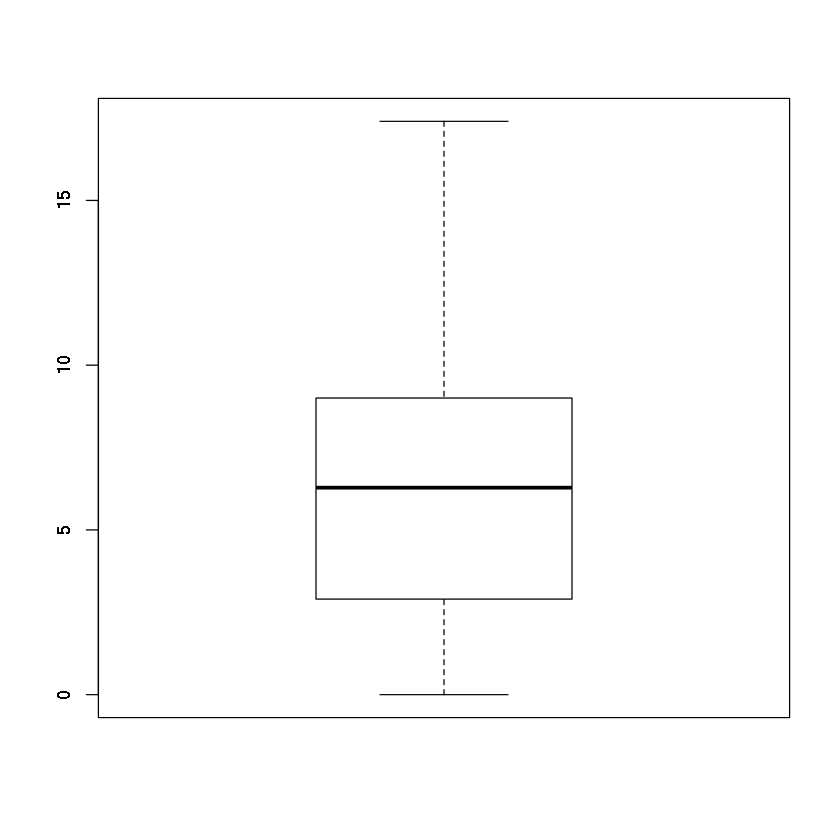

In [10]:
boxplot(df_alkohol$Konzumace)

Jak asi víte, tlustá čára uprostřed značí medián, zatímco dno a vršek krabice potom značí první a třetí kvartil. Maximum a minmum jsou pak reprezentované spodním a horním "fousem".

Funkce boxplot umožňuje zobrazení hned několika grafů najednou. Stačí jí jen další data předat jako další nepojmenované parametery: 

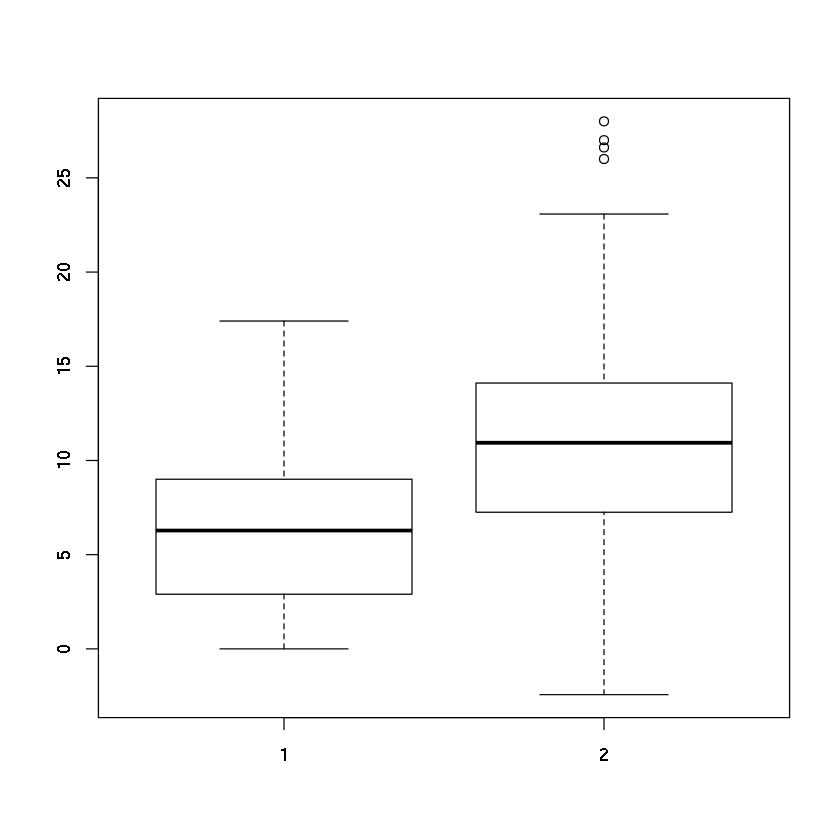

In [11]:
random_data <- c(rnorm(100, mean=10, sd=5), 28, 27, 26) # druhá náhodná proměnná

boxplot(df_alkohol$Konzumace, random_data)

V předchozím příkladě jsme si vytvořili modelová data pomocí funkce `rnorm`, která je velice užitečná, pokud potřebujete rychle získat data z určité distribuce. V tomto případě jsme funkci `rnorm` poručili, aby náhodně vygenerovala vzorek o velikosti 100 datových bodů z normálního rozdělení s průměrem 10 a směrodatnou odchylkou 5.  

K tomuto vzrorku jsme ještě přidali tři odlehlé body, které jsou v krabicovém grafu též znázorněné pomocí teček. Funkce boxplot takto automaticky znázorní body, které mají hodnotu mimo 1.5 násobku kvartilového rozpětí. tento násobek, lze definovat pomocí parametru `range`:

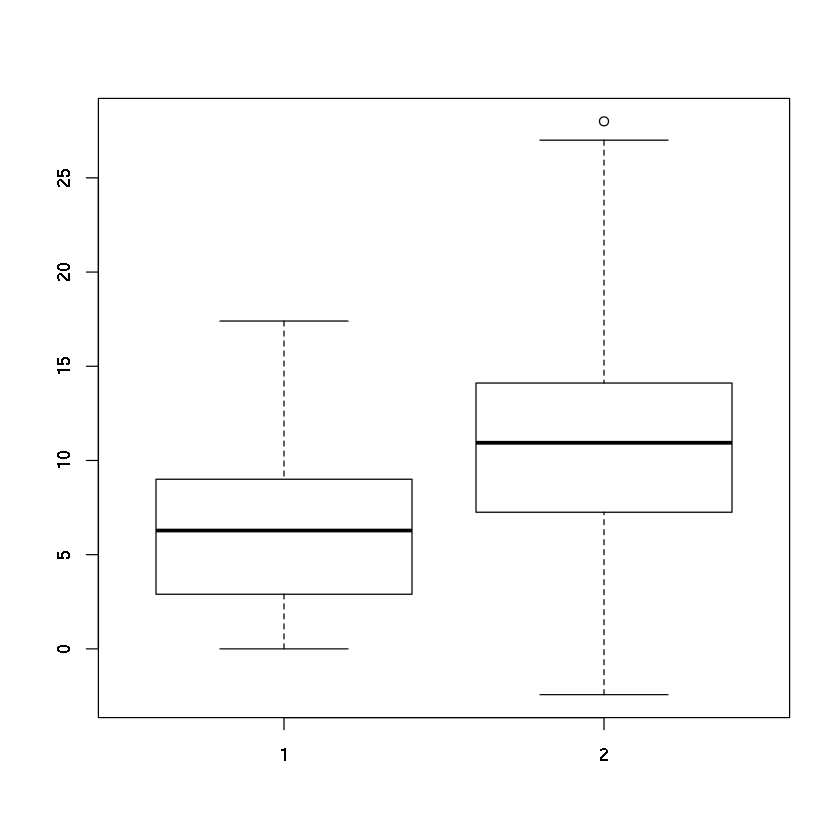

In [12]:
boxplot(df_alkohol$Konzumace, random_data, range = 2.0)

Při nastavení `range` na nulu se "fousy" vždy natáhnou až k maximu a minimu:

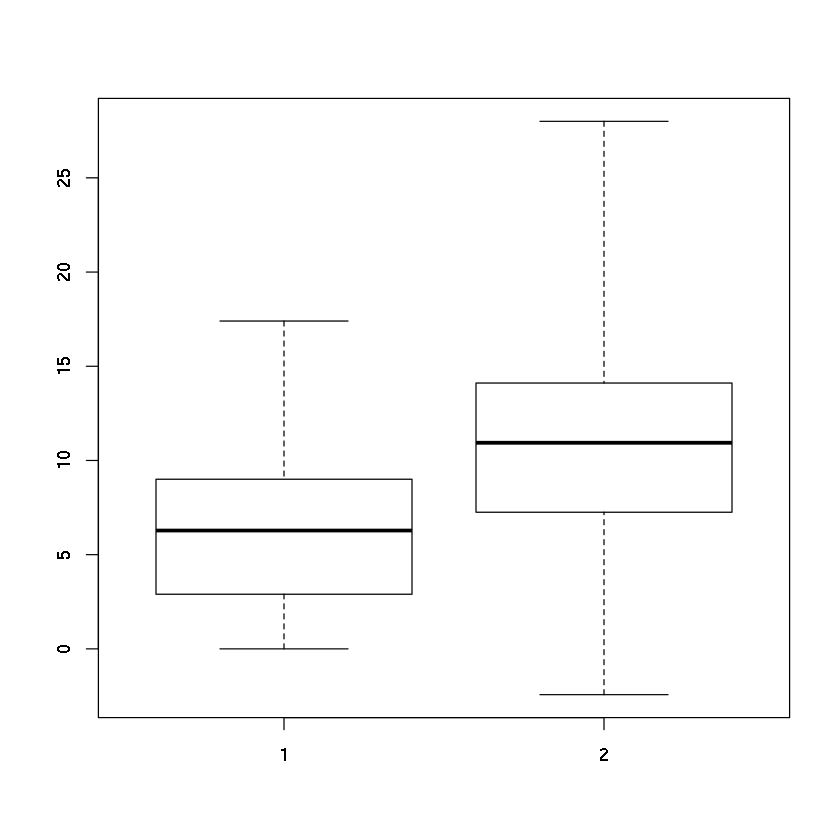

In [13]:
boxplot(df_alkohol$Konzumace, random_data, range = 0)

### Popisné statistiky jednotlivě

V předchozí kapitole jsme si tedy ukázali jak si snadno zobrazit agregované informace o našich vzorcích. Nyní se na jednotlivé parametry podíváme blíže a ukážeme si, jak je v R spočítat.

Nejprve si ale ještě představíme funkci `attach`:

In [14]:
attach(df_alkohol)

Funkce `attach` na první pohled nic nedělá, ale opak je pravdou. Dělá toho totiž docela dost. Funkce `attach` se totiž podívá na jména sloupců naší datové tabulky a do našeho aktuálního prostředí je přidá jako proměnné. Průměrnou konzumaci alkoholu ve světě si teď tedy můžeme spočítat například podle vzorečku:

${\displaystyle {\bar {x}}={\frac {1}{n}}\left(\sum _{i=1}^{n}{x_{i}}\right)={\frac {x_{1}+x_{2}+\cdots +x_{n}}{n}}}$

In [15]:
alkohol_průměr <- sum(Konzumace) / length(Konzumace)
alkohol_průměr

[1] 6.08336

Jak vidíte, nepotřebujeme teď tedy již k datům ve sloupci přistupovat přes objekt `df_alkohol`, ale máme k dispozici přímo proměnnou `Konzumace`. Toto má své výhody i nevýhody. Pokud sloupce v naší tabulce používáme takto, nemusí být totiž při čtení našeho kódu všem jasné, odkud se hodnoty vzaly. Navíc, pokud se datová tabulka změní, vaše proměnné zůstanou beze změny, což chtít můžete nebo taky ne. Je jen na vás, zda je to zrovna v kontextu vaší práce vhodné. 

Pojďme si teď ještě spočítat směrodatnou odchylku. V našem případě se jedná pouze o vzorek populace, takže použijeme vzoreček pro odhad směrodatné odchylky:

$\displaystyle s={\sqrt {\frac {\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}{N-1}}}$

In [16]:
alkohol_so <- sqrt(
    sum((Konzumace - alkohol_průměr)^2) 
    / (length(Konzumace) - 1)
)
alkohol_so

[1] 3.877188

Rozptyl pak už získáme snadno jako druhou mocninu směrodatné odchylky:

In [17]:
alkohol_so^2

[1] 15.03259

R má samozřejmě pro všechny popisné statistiky dedikované funkce, takže vzorečky nemusíte vždy implementovat sami:

In [18]:
mean(Konzumace)
median(Konzumace)
sd(Konzumace)
sd(Konzumace)^2

[1] 6.08336

[1] 6.282133

[1] 3.877188

[1] 15.03259

Tyto funkce mají jeden užitečný parametr, `na.rm`, který  funkci instruuje, aby ve vstupu ignorovala neznámé hodnoty. My jsme neznámé hodnoty z našich dat odstranili, ale v následujícím příkladě bychom dostali v případě funkce `mean` jako výsledek opět neznámou hodnotu:

In [19]:
x <- c(1, NA, 2)
mean(x)

[1] NA

zatímco při použití parametru `na.rm` dostaneme výsledek příslušející známým hodnotám:

In [20]:
mean(x, na.rm = T)

[1] 1.5

Jednotlivé kvantily lze jednoduše získat pomocí funkce `quantile`. Takto bychom například mohli snadno získat první a třetí kvartil:

In [21]:
quantile(Konzumace, c(0.25, 0.75))

25%      75% 
2.925000 9.002196

Pro minimum a maximum v R též existují příslušné funkce:

In [22]:
min(Konzumace)
max(Konzumace)

[1] 0

[1] 17.4

Když už mluvíme o extrémech, pojďmě se podívat na země, které pijí nejvíce:

In [23]:
df_alkohol <- df_alkohol[order(df_alkohol$Konzumace, decreasing = T),]
head(df_alkohol, 10)

,Země,Konzumace
157,Moldova,17.4
19,Belarus,17.1
135,Lithuania,16.2
195,Russian Federation,14.5
56,Czech Republic,14.1
194,Romania,12.9
202,Serbia,12.9
12,Australia,12.6
189,Portugal,12.5
207,Slovak Republic,12.5


a nejméně:

In [24]:
tail(df_alkohol, 10)

,Země,Konzumace
66,"Egypt, Arab Rep.",0.3
171,Niger,0.3
17,Bangladesh,0.2
47,Comoros,0.2
200,Saudi Arabia,0.2
257,"Yemen, Rep.",0.2
121,Kuwait,0.1
149,Mauritania,0.1
181,Pakistan,0.1
133,Libya,0.0


Česko v tomto seznamu tedy zabírá prominentní pozici hned za Ruskem, které je svou láskou k vodce proslulé. Na opačné straně spektra jsou naopak především muslimské země.

### Histogram

Nakonec si v této lekci ještě představíme funkci `hist`, která nám umožní zase trochu jiný pohled na naše data:

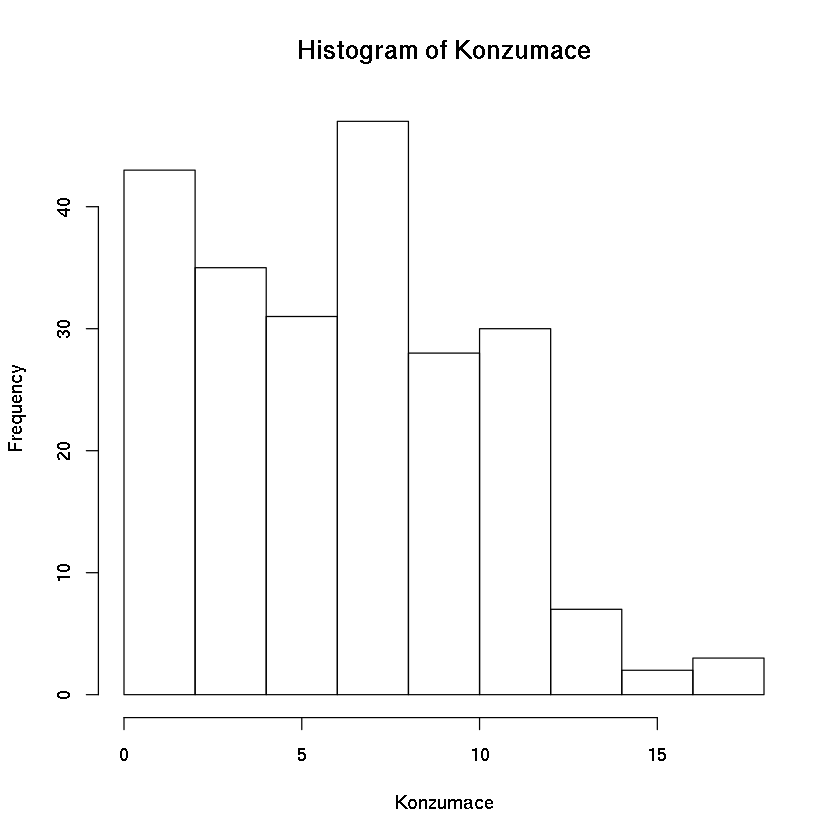

In [25]:
hist(Konzumace)

Počet intervalů (buněk), do kterých chceme naše data v histogramu rozdělit, můžeme regulovat pomocí argumentu `breaks`:

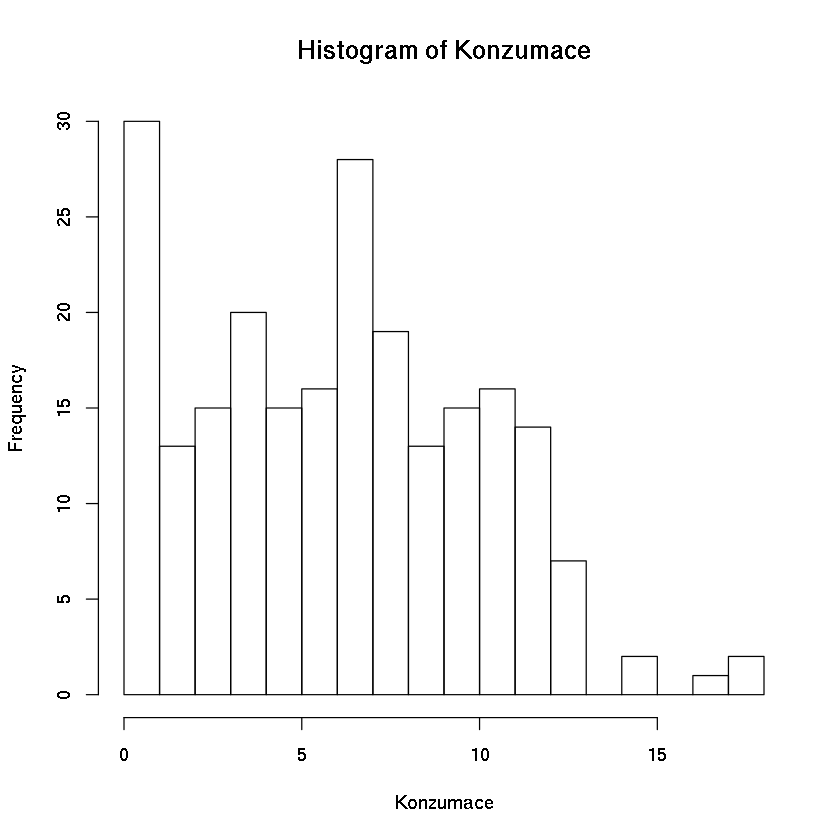

In [26]:
hist(Konzumace, breaks = 20)

Tato reprezentace odhaluje, že v našem souboru je 30 zemí, ve kterých se skoro vůbec nepije (roční konzumace alkoholu menší než 1 litr na osobu). Zároveň zde máme i několik zemí, které jsou tak trochu "mimo" (roční konzumace vyšší než 14 litrů na osobu). V těchto zemích je zřejmě alkohol důležitou součástí kultury. Pojďme se podívat o jaké země se jedná:

In [27]:
df_alkohol[df_alkohol$Konzumace >= 14, ]

,Země,Konzumace
157,Moldova,17.4
19,Belarus,17.1
135,Lithuania,16.2
195,Russian Federation,14.5
56,Czech Republic,14.1


Je to tedy prvních pět zemí z našeho seznamu deseti největších světových opilců.

Z histogramu se zdá, že naše data jsou relativně normálně rozdělená. Především v případě, kdy bychom z nich odstranili případné odlehlé body:

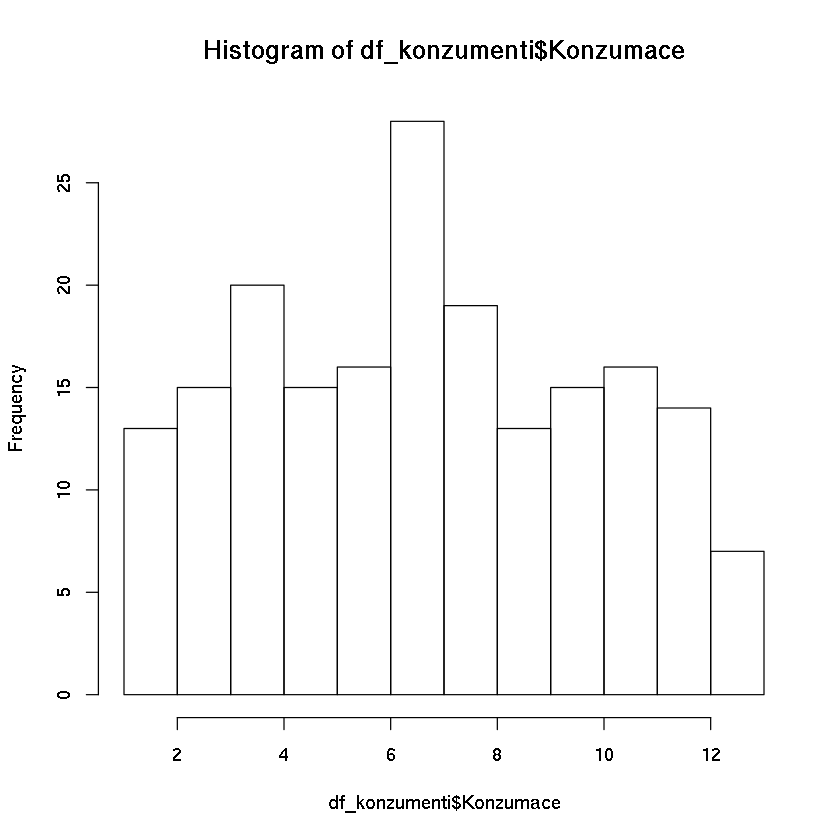

In [28]:
df_konzumenti <- df_alkohol[df_alkohol$Konzumace < 14 & df_alkohol$Konzumace > 1, ]
hist(df_konzumenti$Konzumace, breaks = 15)

Porovnejme tedy histogram výše s modelovým normálním rozdělením stejných parametrů:

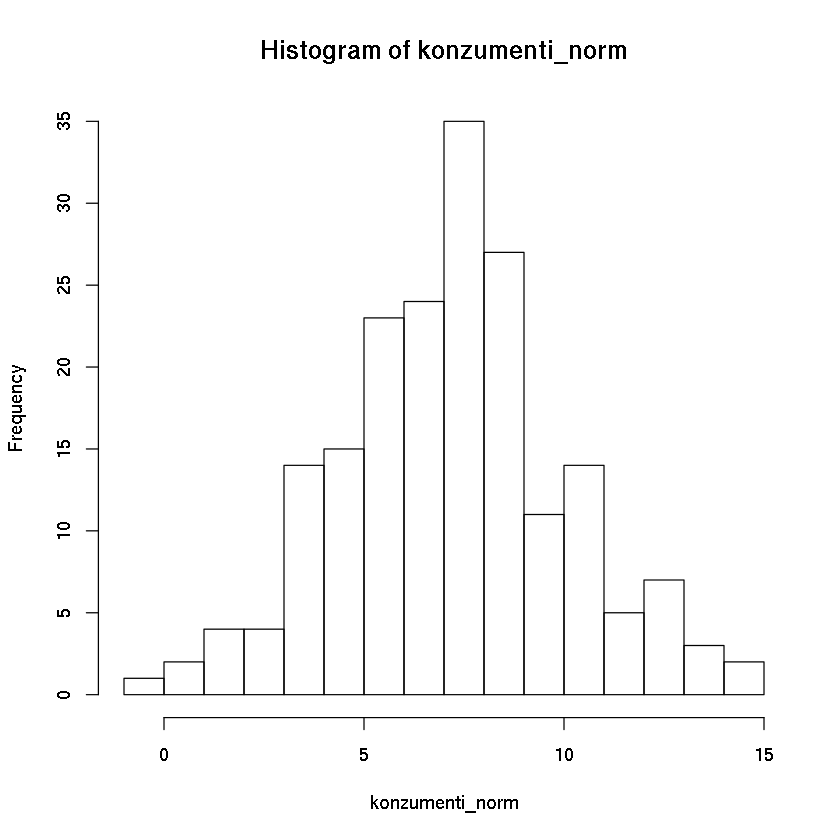

In [29]:
konzumenti_norm <- rnorm(
        nrow(df_konzumenti)
        , mean = mean(df_konzumenti$Konzumace)
        , sd = sd(df_konzumenti$Konzumace)
)
hist(konzumenti_norm, breaks = 15)

Naše data jsou tedy oproti opravdovému normálnímu rozdělení trochu více roztažená. Jsou tedy někde mezi uniformním rozdělením a normálním rozdělením. Příklad uniformního rozdělení se stejnými parametry si můžeme ukázat pomocí funkce `runif`:

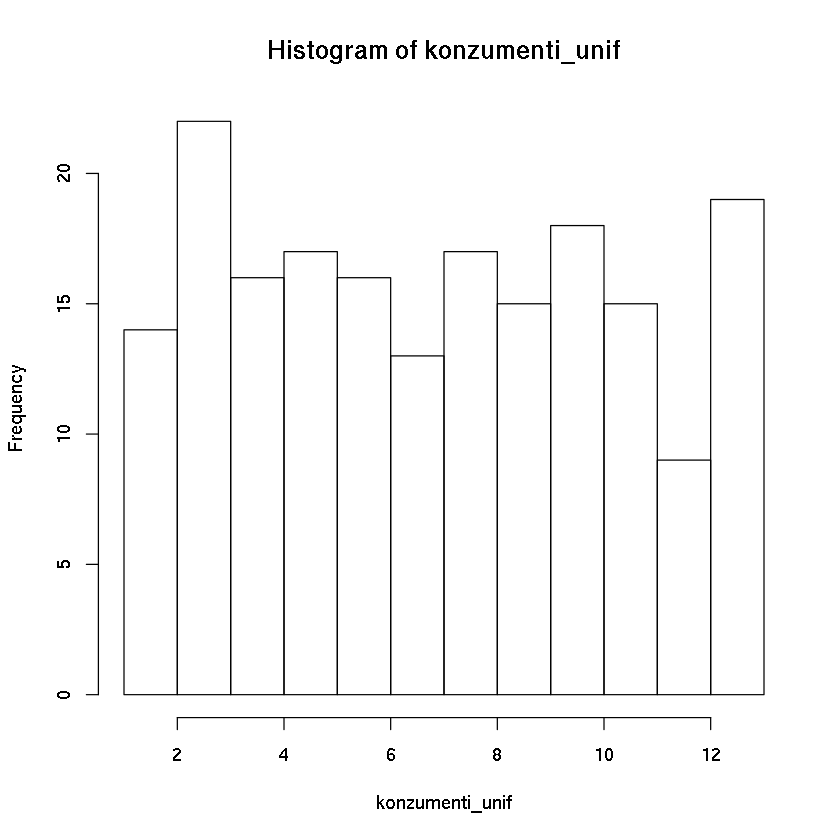

In [30]:
konzumenti_unif <- runif(
        nrow(df_konzumenti)
        , max = max(df_konzumenti$Konzumace)
        , min = min(df_konzumenti$Konzumace)
)


hist(konzumenti_unif, breaks = 15)

Mimo funkce `rnorm` a `runif` existují v R i další funkce pro generování vzorků s různými náhodnými rozděleními. K dispozici je například funkce pro rozdělení chi-kvadrát, $\chi ^{2}$: 

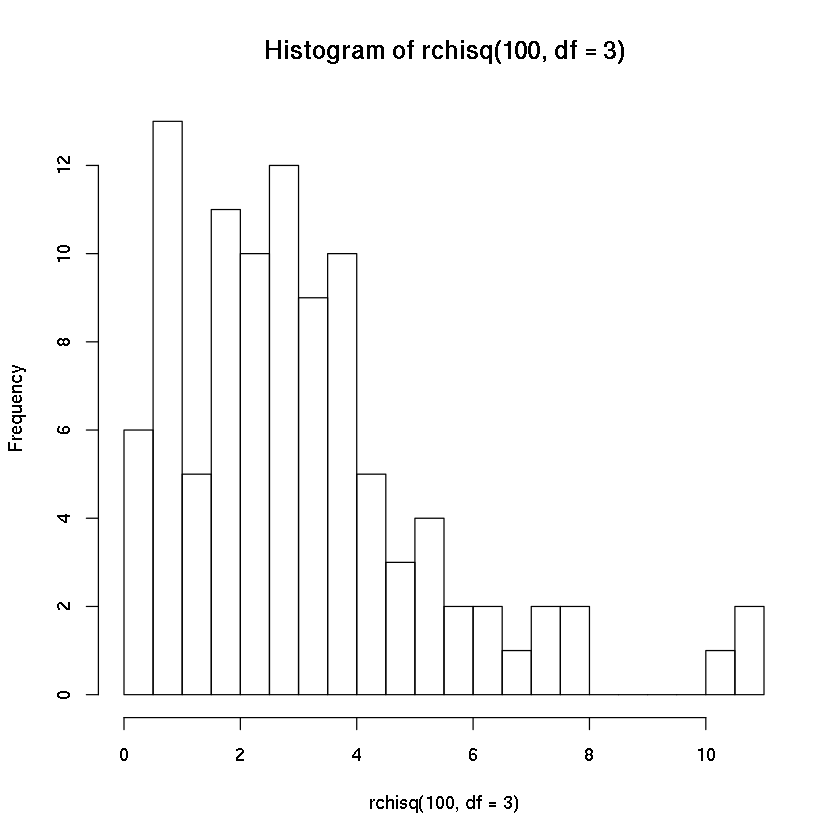

In [31]:
hist(rchisq(100, df = 3), breaks = 20)

studentovo t-rozdělení:

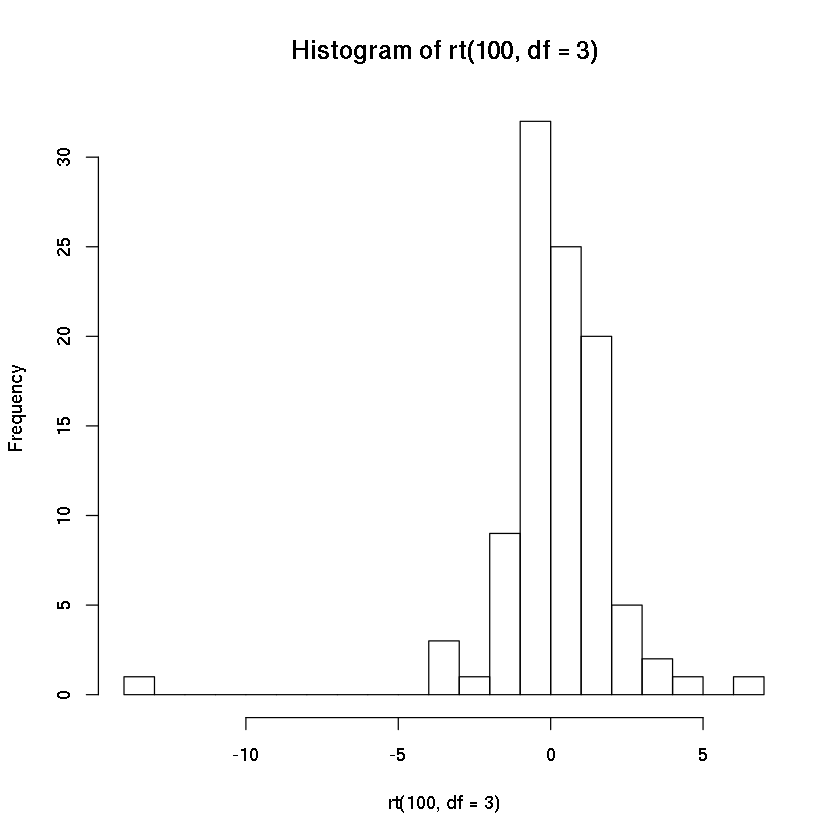

In [32]:
hist(rt(100, df = 3), breaks = 20)

nebo F-rozdělení:

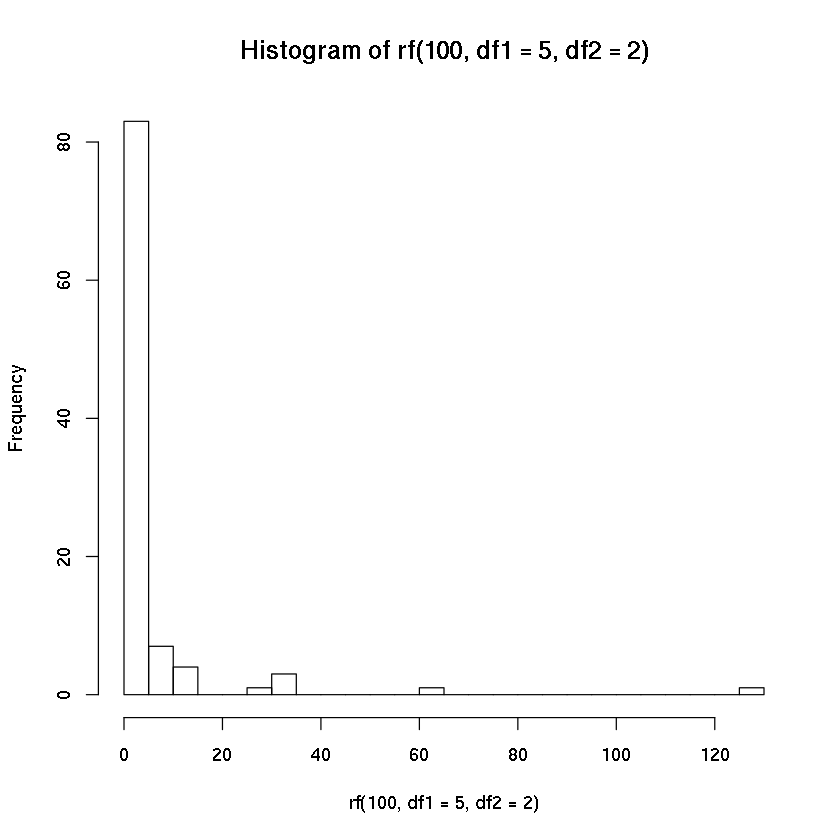

In [33]:
hist(rf(100, df1 = 5, df2 = 2), breaks = 20)